In [1]:
%pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
df=pd.read_csv('Mobile Price Prediction Datatset.csv')

In [105]:
df.head()

,Unnamed: 0,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,1,I Kall K11,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,2,Nokia 105 ss,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,3,"Samsung Galaxy A50 (White, 64 )",4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4,"POCO F1 (Steel Blue, 128 )",4.5,6.0,128.0,6.18,35,15.0,3800,18999


# Check the size of the dataset

In [106]:
df.shape

(836, 10)

# Check the null Values

In [107]:
# Check the null Values
df.isnull().sum()

Unnamed: 0         0
Brand me           0
Ratings           31
RAM                7
ROM                4
Mobile_Size        2
Primary_Cam        0
Selfi_Cam        269
Battery_Power      0
Price              0
dtype: int64

# check the data types

In [108]:
df.dtypes

Unnamed: 0         int64
Brand me          object
Ratings          float64
RAM              float64
ROM              float64
Mobile_Size      float64
Primary_Cam        int64
Selfi_Cam        float64
Battery_Power      int64
Price              int64
dtype: object

# Check the unique values

In [109]:
# Check the unique values
df.nunique()

Unnamed: 0       836
Brand me         427
Ratings           20
RAM               13
ROM               22
Mobile_Size       47
Primary_Cam       11
Selfi_Cam         23
Battery_Power     49
Price            253
dtype: int64

In [110]:
df['RAM'].value_counts()

6.0     430
8.0     158
4.0     113
3.0      40
12.0     31
2.0      21
1.0      20
10.0      7
5.0       4
0.0       2
25.0      1
30.0      1
34.0      1
Name: RAM, dtype: int64

In [111]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [112]:
df.head(2)

,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.0,48,13.0,4000,24999
1,I Kall K11,3.4,6.0,64.0,4.5,48,12.0,4000,15999


# Fill all the null values

In [113]:
df.isnull().sum()

Brand me           0
Ratings           31
RAM                7
ROM                4
Mobile_Size        2
Primary_Cam        0
Selfi_Cam        269
Battery_Power      0
Price              0
dtype: int64

In [114]:
def fill_null(df):
    for cols in df.columns:
        if df[cols].isnull().sum()>0:
            df[cols]=df[cols].fillna(df[cols].mode()[0])
    return df

In [115]:
df=fill_null(df)

In [116]:
df.isnull().sum()

Brand me         0
Ratings          0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
Price            0
dtype: int64

# Check the duplicate values

In [117]:
df.duplicated().sum()

221

#### Here dataset is small so we can't delete the duplicate values 

In [118]:
df[df.duplicated()].to_csv('duplicate.csv')

In [119]:
# Lets check only brand name

In [120]:
df['Brand me'].duplicated().sum()

409

In [121]:
df[df['Brand me'].duplicated()]

,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
25,Snexian Guru 332,4.5,6.0,32.0,4.50,64,13.0,3000,649
41,Inovu A9,3.6,6.0,32.0,4.54,38,0.0,1200,945
47,Jivi R21Plus,4.3,1.0,16.0,4.50,48,2.0,3000,869
55,InFocus POWER 2,4.1,8.0,64.0,4.54,64,13.0,2500,1390
62,Kechaoda A32,3.8,6.0,32.0,4.40,48,8.0,3000,930
...,...,...,...,...,...,...,...,...,...
831,Karbonn K24 Plus Pro,3.8,6.0,32.0,4.54,48,12.0,2800,1299
832,InFocus POWER 2,4.1,8.0,64.0,4.54,64,8.0,2500,1390
833,"Alcatel 5V (Spectrum Blue, 32 )",4.4,3.0,32.0,6.20,48,1.0,3800,9790
834,JIVI JV 12M,3.7,10.0,32.0,4.50,64,8.0,3500,799


# Check the numerical representation

In [122]:
df.describe()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
count,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.00000
mean,4.117823,6.065789,64.218182,5.594657,47.983254,9.210526,3274.688995,18220.34689
std,0.366280,2.519714,53.366485,3.894362,11.170093,5.419299,927.518852,52805.55022
min,2.800000,0.000000,0.000000,2.000000,5.000000,0.000000,1020.000000,479.00000
25%,3.900000,6.000000,32.000000,4.500000,48.000000,8.000000,3000.000000,984.75000
50%,4.150000,6.000000,35.000000,4.735000,48.000000,8.000000,3000.000000,1697.00000
75%,4.400000,6.000000,64.000000,6.300000,48.000000,12.000000,3800.000000,18999.00000
max,4.800000,34.000000,256.000000,44.000000,64.000000,61.000000,6000.000000,573000.00000


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand me       836 non-null    object 
 1   Ratings        836 non-null    float64
 2   RAM            836 non-null    float64
 3   ROM            836 non-null    float64
 4   Mobile_Size    836 non-null    float64
 5   Primary_Cam    836 non-null    int64  
 6   Selfi_Cam      836 non-null    float64
 7   Battery_Power  836 non-null    int64  
 8   Price          836 non-null    int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 55.6+ KB


#### Change the dtype of selfi cam from float64 in int 64

In [124]:
df['Selfi_Cam']=df['Selfi_Cam'].astype('int64')

In [125]:
df.head(2)

,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.0,48,13,4000,24999
1,I Kall K11,3.4,6.0,64.0,4.5,48,12,4000,15999


In [126]:
df.dtypes

Brand me          object
Ratings          float64
RAM              float64
ROM              float64
Mobile_Size      float64
Primary_Cam        int64
Selfi_Cam          int64
Battery_Power      int64
Price              int64
dtype: object

### Change the RAM	ROM data type

In [127]:
df[['RAM','ROM']]=df[['RAM','ROM']].astype('int64')

In [128]:
df.head(2)

,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,"LG V30+ (Black, 128 )",4.3,4,128,6.0,48,13,4000,24999
1,I Kall K11,3.4,6,64,4.5,48,12,4000,15999


In [129]:
df.dtypes

Brand me          object
Ratings          float64
RAM                int64
ROM                int64
Mobile_Size      float64
Primary_Cam        int64
Selfi_Cam          int64
Battery_Power      int64
Price              int64
dtype: object

# Corrections done for numerical dtata 

# EDA

### Top 10 Mobiles based on the price

In [29]:
df.sort_values(by='Price',ascending=False).head(10)

,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
454,"Apple iPhone XR ((PRODUCT)RED, 128 )",4.6,12,64,6.10,35,7,3500,573000
35,"Apple iPhone XR ((PRODUCT)RED, 128 )",4.6,12,128,6.10,35,7,3500,573000
115,"Apple iPhone XR (Yellow, 128 )",4.6,12,64,6.10,35,7,3500,573000
500,"Apple iPhone XR (Coral, 128 )",4.6,12,64,6.10,35,7,3500,573000
774,"Samsung Galaxy S10 (Prism White, 512 )",4.6,8,128,6.10,48,12,3000,563000
437,"Samsung Galaxy S10 (Prism White, 512 )",4.6,8,128,6.10,48,12,3000,563000
191,"Vivo V17Pro (Glacier Ice White, 128 )",4.5,8,128,6.44,48,13,4100,253000
140,"Redmi Note 8 (Cosmic Purple, 128 )",4.4,6,128,6.30,48,1,3800,153000
773,"Apple iPhone 11 Pro (Silver, 512 )",4.7,8,64,5.80,35,12,3500,140300
436,"Apple iPhone 11 Pro (Silver, 512 )",4.7,8,64,5.80,35,12,5000,140300


### Top 10 rating mobiles

In [30]:
df.sort_values(by='Ratings',ascending=False).head(10)

,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
227,Forme Turbo1,4.8,12,15,4.5,35,8,2800,899
489,"Apple iPhone 8 (PRODUCT)RED (Red, 256 )",4.7,12,64,4.7,35,7,3500,56999
749,"Apple iPhone 11 Pro (Space Grey, 512 )",4.7,8,64,5.8,35,12,3500,140300
807,"Apple iPhone 11 Pro Max (Gold, 64 )",4.7,8,64,6.5,35,12,3500,117100
223,"Apple iPhone XS (Silver, 512 )",4.7,8,64,5.8,35,12,3500,112450
478,"Apple iPhone 11 Pro Max (Gold, 64 )",4.7,8,64,6.5,35,12,3500,117100
67,"Apple iPhone 11 (Yellow, 64 )",4.7,8,64,6.1,35,12,3800,68300
66,"Apple iPhone 8 (PRODUCT)RED (Red, 256 )",4.7,12,256,4.7,35,7,5000,56999
436,"Apple iPhone 11 Pro (Silver, 512 )",4.7,8,64,5.8,35,12,5000,140300
490,"Apple iPhone 11 (Yellow, 64 )",4.7,8,64,6.1,35,12,3500,68300


### Top 10 mobiles based on Battery

In [31]:
df.sort_values(by='Battery_Power',ascending=False).head(10)

,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
278,"Tecno Spark Power 2 (Misty Grey, 64 )",4.3,4,64,7.00,48,5,6000,9999
403,"Samsung Galaxy M31 (Ocean Blue, 128 )",4.5,6,128,6.40,64,8,6000,19900
326,"Samsung Galaxy M31 (Space Black, 128 )",4.5,6,128,6.40,64,8,6000,19900
591,"Samsung Galaxy M31 (Space Black, 128 )",4.5,6,128,6.40,64,8,6000,19900
665,"Samsung Galaxy M31 (Ocean Blue, 128 )",4.5,6,128,6.40,64,8,6000,19900
279,"Tecno Spark Power 2 (Ice Jadeite, 64 )",4.3,4,64,7.00,48,5,6000,9999
266,"Realme rzo 10 (That White, 128 )",4.5,4,128,6.50,48,8,5000,11999
275,"Vivo U10 (Electric Blue, 32 )",4.4,3,32,6.35,38,8,5000,10990
274,"Motorola One Fus+ (Twilight Blue, 128 )",4.5,6,128,6.50,64,8,5000,17499
273,"Vivo U10 (Thunder Black, 32 )",4.4,3,32,6.35,38,8,5000,10990


# Check the outliers are present or not

<AxesSubplot:ylabel='Price'>

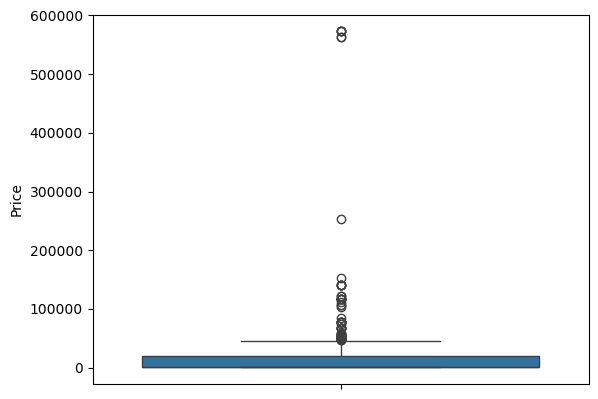

In [32]:
sns.boxplot(df['Price'])

### We can't remove the outliers here because small data set so we will go for normalization

In [33]:
df.columns

Index(['Brand me', 'Ratings', 'RAM', 'ROM', 'Mobile_Size', 'Primary_Cam',
       'Selfi_Cam', 'Battery_Power', 'Price'],
      dtype='object')

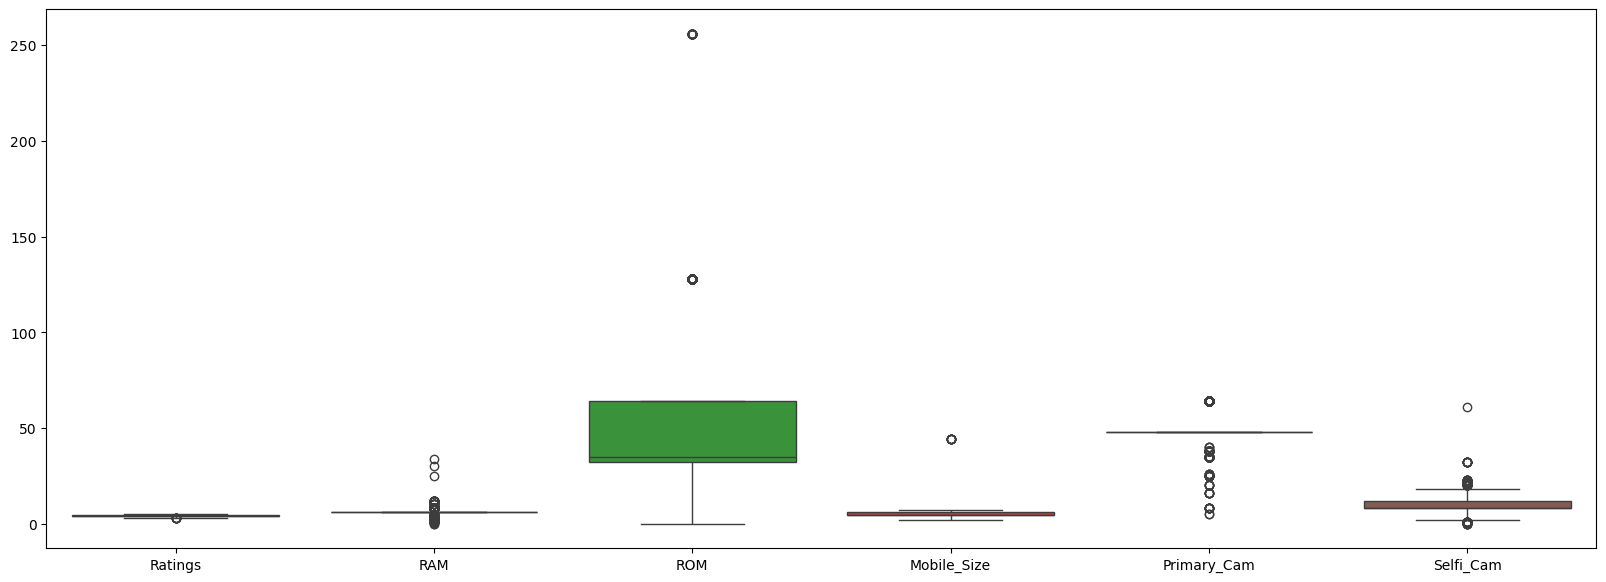

In [34]:
plt.subplots(figsize=(20,7))
sns.boxplot(df[['Ratings','RAM', 'ROM', 'Mobile_Size', 'Primary_Cam',
       'Selfi_Cam']])
plt.show()

### Do EDA on RAM ROM Mobile size and selfi cam

In [35]:
df.sort_values(by='RAM',ascending=False).head(5)

,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
205,Intex Eco Selfie 2,3.9,34,64,4.50,48,21,3000,955
190,JIVI JV 12M,4.0,30,0,4.50,64,8,3500,799
165,Micax X773,3.8,25,25,4.54,48,8,3000,1199
550,"Apple iPhone 11 Pro (Space Grey, 256 )",4.7,12,64,5.80,35,12,3500,121300
35,"Apple iPhone XR ((PRODUCT)RED, 128 )",4.6,12,128,6.10,35,7,3500,573000


In [36]:
df.sort_values(by='Price',ascending=True).head(10)

,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
133,Grabo G100,3.7,8,64,4.50,48,5,3000,479
152,I Kall K73,3.2,6,64,4.50,64,8,3500,539
97,Q-Tel Q8,3.4,6,32,4.77,48,8,3000,559
183,Callbar A35S,3.4,0,64,4.50,48,8,3000,595
317,I Kall K6610,3.5,6,64,4.50,48,8,3000,599
204,Mymax A12,4.0,6,32,4.50,64,8,3000,599
201,GreenBerry 312,3.4,6,64,4.50,48,20,3000,599
248,I Kall K11,3.4,6,64,4.50,48,14,3000,599
584,I Kall K6610,3.5,6,64,4.50,48,8,3000,599
220,Ecotel E17,3.6,6,20,4.50,48,8,3000,599


### After this I can say this data set is not good for training, wrong information provided by the data set
### Bcoz their is no front camera in Grabo G100	

# Corr

In [37]:
df.corr()

<ipython-input-37-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
Ratings,1.000000,0.094622,0.426000,0.078706,-0.104162,-0.053659,0.439990,0.346835
RAM,0.094622,1.000000,0.251643,-0.000767,0.139477,0.160447,0.023184,0.236955
ROM,0.426000,0.251643,1.000000,0.109099,-0.072823,-0.054459,0.410052,0.256314
Mobile_Size,0.078706,-0.000767,0.109099,1.000000,-0.060376,-0.031382,0.131500,0.049291
Primary_Cam,-0.104162,0.139477,-0.072823,-0.060376,1.000000,0.121789,-0.057011,-0.158122
Selfi_Cam,-0.053659,0.160447,-0.054459,-0.031382,0.121789,1.000000,-0.119010,-0.011729
Battery_Power,0.439990,0.023184,0.410052,0.131500,-0.057011,-0.119010,1.000000,0.168626
Price,0.346835,0.236955,0.256314,0.049291,-0.158122,-0.011729,0.168626,1.000000


<ipython-input-38-e59d7fb9ac3e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='Greens',annot=True)


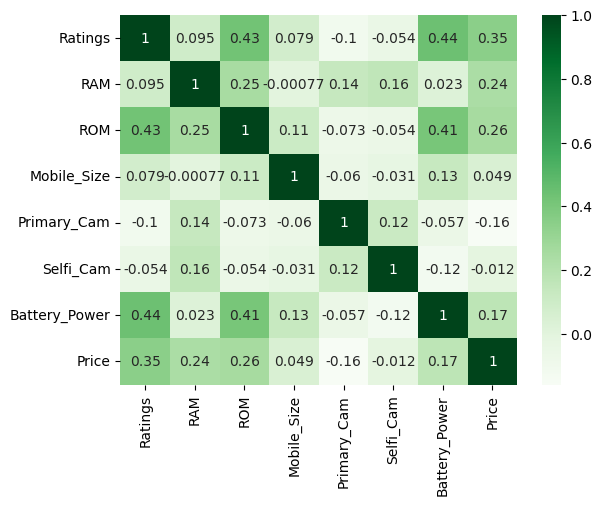

In [38]:
sns.heatmap(df.corr(),cmap='Greens',annot=True)
plt.show()

In [39]:
corr=df.corr().unstack()

<ipython-input-39-03b818ec3c54>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr().unstack()


In [40]:
corr.sort_values(ascending=False,kind='quicksort')

Ratings        Ratings          1.000000
RAM            RAM              1.000000
Battery_Power  Battery_Power    1.000000
Selfi_Cam      Selfi_Cam        1.000000
Primary_Cam    Primary_Cam      1.000000
                                  ...   
               Ratings         -0.104162
Battery_Power  Selfi_Cam       -0.119010
Selfi_Cam      Battery_Power   -0.119010
Price          Primary_Cam     -0.158122
Primary_Cam    Price           -0.158122
Length: 64, dtype: float64

In [41]:
print(corr[((corr >= .5) | (corr <= -.5)) & (corr !=1.000)])

Series([], dtype: float64)


# Lets do the Feature enginnering

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
df.nunique()

Brand me         427
Ratings           20
RAM               13
ROM               21
Mobile_Size       47
Primary_Cam       11
Selfi_Cam         23
Battery_Power     49
Price            253
dtype: int64

### lets make the Brand me as One hot encoder and rest all the category we will standarize them

In [44]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder

In [45]:
ohe=OneHotEncoder()

In [46]:
la=LabelEncoder()

In [47]:
df.head(2)

,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,"LG V30+ (Black, 128 )",4.3,4,128,6.0,48,13,4000,24999
1,I Kall K11,3.4,6,64,4.5,48,12,4000,15999


In [48]:
# df['Brand me']=ohe.fit(df[['Brand me']])

In [49]:
# df['Brand me']=la.fit_transform(df[['Brand me']])

In [50]:
ore=OrdinalEncoder()

In [51]:
df['Brand me']=ore.fit_transform(df[['Brand me']])

In [52]:
df.head(2)

,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,184.0,4.3,4,128,6.0,48,13,4000,24999
1,82.0,3.4,6,64,4.5,48,12,4000,15999


In [53]:
df.nunique()

Brand me         427
Ratings           20
RAM               13
ROM               21
Mobile_Size       47
Primary_Cam       11
Selfi_Cam         23
Battery_Power     49
Price            253
dtype: int64

### Now Apply the StandardScaler

In [54]:
scaler=StandardScaler()

In [55]:
df.columns

Index(['Brand me', 'Ratings', 'RAM', 'ROM', 'Mobile_Size', 'Primary_Cam',
       'Selfi_Cam', 'Battery_Power', 'Price'],
      dtype='object')

In [56]:
cols=['Ratings', 'RAM', 'ROM', 'Mobile_Size', 'Primary_Cam','Selfi_Cam', 'Battery_Power', 'Price']
df[cols]=scaler.fit_transform(df[cols])

In [57]:
df.head(2)

,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,184.0,0.497669,-0.820341,1.195878,0.104147,0.0015,0.699674,0.782459,0.128447
1,82.0,-1.960939,-0.026126,-0.004082,-0.281256,0.0015,0.515038,0.782459,-0.042092


# Split the data set

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X=df.drop(columns='Price')
y=df['Price']

In [60]:
X.shape,y.shape

((836, 8), (836,))

In [61]:
X_train,X_test,y_train,y_text=train_test_split(X,y,test_size=0.2,random_state=20)

In [62]:
X_train.head(2)

,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power
598,44.0,-0.868224,-0.026126,-0.604062,-0.229869,1.434754,-0.223507,0.135184
327,425.0,0.770847,0.768090,1.195878,0.217198,0.001500,0.699674,1.257127


# Train the model

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xg

In [64]:
lr=LogisticRegression()

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
from sklearn.linear_model import LinearRegression

In [79]:
models=[
    # {
    # "Name":'LinearRegression',
    # "model":LinearRegression()
    # "params":{'n_jobs':[0.5,1]}
    # },
    {
        "Name":"RandomForestRegressor",
        "model":RandomForestRegressor(),
        "params":{
            "n_estimators":[100,120,150,170,200],
            "criterion":['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
        }
            
    },
    {
        "Name":"DecisionTreeRegressor",
        "model":DecisionTreeRegressor(),
        "params":{
            "criterion":['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
            "splitter":['best', 'random']
        }
    },
        {
            "Name":"KNeighborsRegressor",
            "model":KNeighborsRegressor(),
            "params":{
                "n_neighbors":[5,6,7,8,9],
                "weights":['uniform', 'distance']
            }
        },
    {
        "Name":"xgRegressor",
        "model":xg.XGBRFRegressor(),
        "params":{
            # "loss":['squared_error', 'absolute_error', 'huber', 'quantile'],
            "learning_rate":[0.001,0.01],
            "n_estimators":[100,150,170,200,250]
        }
    }
            
       ]

In [80]:
from sklearn.metrics import r2_score

In [222]:
for model in models:
    print(f"Grid Search for {model['Name']}")
    grid=GridSearchCV(model['model'],model['params'],cv=5)
    grid.fit(X_train,y_train)
    print(f"Traininng acc{grid.score(X_train,y_train)}")
    print(f"Best_param{grid.best_params_}")
    print(f"Best Score{grid.best_score_}")
    y_pp_new=r2_score(grid.predict(X_test),y_text)
    print(f"r2Score = {y_pp_new}")
    print("====================================")

Grid Search for RandomForestRegressor


/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 378, in fit
    raise ValueError(
ValueError: Some value(s) of y are negative which 

Traininng acc0.9764829445710898
Best_param{'criterion': 'squared_error', 'n_estimators': 200}
Best Score0.3016464775041536
r2Score = 0.29499474316899255
Grid Search for DecisionTreeRegressor


/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/lib/python3.11/site-packages/sklearn/tree/_classes.py", line 1320, in fit
    super()._fit(
  File "/lib/python3.11/site-packages/sklearn/tree/_class

Traininng acc0.9999984021728148
Best_param{'criterion': 'squared_error', 'splitter': 'best'}
Best Score-0.056407586614926064
r2Score = 0.14249563662403375
Grid Search for KNeighborsRegressor
Traininng acc0.9999984021728148
Best_param{'n_neighbors': 9, 'weights': 'distance'}
Best Score-0.06420191879682388
r2Score = 0.26347228785724586
Grid Search for xgRegressor
Traininng acc-0.17606934423915743
Best_param{'learning_rate': 0.01, 'n_estimators': 170}
Best Score-0.6419168735925957
r2Score = -28749.236658153295


In [223]:
rfr=RandomForestRegressor(criterion= 'squared_error', n_estimators= 170)

In [224]:
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=170)

In [225]:
r2_score(y_text,rfr.predict(X_test))

0.311182456198405

### Now we will go for Randomforest along with pipline

In [84]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [177]:
ord_pipe=Pipeline(steps=[
    ('ordinal',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)),
    ('impute',SimpleImputer())
])

In [178]:
scaler_pipe=Pipeline(steps=[
    ('scaler',StandardScaler()),
    ('impute',SimpleImputer(strategy='median'))
])

In [179]:
ord_pipe

Pipeline(steps=[('ordinal',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('impute', SimpleImputer())])

In [180]:
scaler_pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('impute', SimpleImputer(strategy='median'))])

In [181]:
df.columns

Index(['Brand me', 'Ratings', 'RAM', 'ROM', 'Mobile_Size', 'Primary_Cam',
       'Selfi_Cam', 'Battery_Power', 'Price'],
      dtype='object')

In [204]:
combine_pipe=ColumnTransformer(transformers=[
    ('ordinal',ord_pipe,['Brand me']),
    ('sclaer_pipe',scaler_pipe,['Ratings', 'RAM', 'ROM', 'Mobile_Size', 'Primary_Cam',
       'Selfi_Cam', 'Battery_Power'])
])

In [205]:
combine_pipe

ColumnTransformer(transformers=[('ordinal',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1)),
                                                 ('impute', SimpleImputer())]),
                                 ['Brand me']),
                                ('sclaer_pipe',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('impute',
                                                  SimpleImputer(strategy='median'))]),
                                 ['Ratings', 'RAM', 'ROM', 'Mobile_Size',
                                  'Primary_Cam', 'Selfi_Cam',
                                  'Battery_Power'])])

In [206]:
model_pipe=Pipeline(steps=[('Combine_pipe',combine_pipe),('RFR',RandomForestRegressor(criterion= 'squared_error', n_estimators= 170))])

In [207]:
model_pipe

Pipeline(steps=[('Combine_pipe',
                 ColumnTransformer(transformers=[('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('impute',
                                                                   SimpleImputer())]),
                                                  ['Brand me']),
                                                 ('sclaer_pipe',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Ratings', 'RAM', 'ROM',
                                                   'Mobile_Size', 'Primary_Cam',
                                                   'Selfi_Cam',
                                                   'Battery_Power'])])),
                ('RFR', RandomForestRegressor(n_estimators=170))])

# Train the pipeline

In [208]:
df_pipe=df.copy()

In [209]:
Xnew=df_pipe.drop(columns=['Price'])
ynew=df_pipe['Price']

In [210]:
Xnew_train,Xnew_test,ynew_train,ynew_test=train_test_split(Xnew,ynew,test_size=0.2,random_state=20)

In [211]:
model_pipe.fit(Xnew_train,ynew_train)

Pipeline(steps=[('Combine_pipe',
                 ColumnTransformer(transformers=[('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('impute',
                                                                   SimpleImputer())]),
                                                  ['Brand me']),
                                                 ('sclaer_pipe',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Ratings', 'RAM', 'ROM',
                                                   'Mobile_Size', 'Primary_Cam',
                                                   'Selfi_Cam',
                                                   'Battery_Power'])])),
                ('RFR', RandomForestRegressor(n_estimators=170))])

In [212]:
model_pipe.score(Xnew_train,ynew_train)

0.9763907040961914

In [213]:
Xnew_train.head(2)

,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power
598,Easyfone Star,3.8,6,32,4.70,64,8,3400
327,"iQOO 3 (Tordo Black, 128 )",4.4,8,128,6.44,48,13,4440


In [214]:
Xnew_test.shape

(168, 8)

In [215]:
y_pred=model_pipe.predict(Xnew_test)

In [216]:
from sklearn.metrics import r2_score

In [217]:
r2_score(y_pred,ynew_test)

0.17747976262292786

# Test the Model

In [230]:
model_pipe.predict(Xnew_train.head(2))

array([ 3961.95882353, 35360.58823529])

In [232]:
df.head(1)

,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,"LG V30+ (Black, 128 )",4.3,4,128,6.0,48,13,4000,24999


In [233]:
model_pipe.predict(df.head(1))

array([25969.10588235])

# Save the model and dump

In [234]:
import pickle

In [235]:
pickle.dump(model_pipe,open('model_pipe.pkl','wb'))